<a href="https://colab.research.google.com/github/cesaraugustopereirabr/Train_YOLO/blob/main/treinamento_da_rede_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving familia.jpg to familia (5).jpg

image 1/1 /content/familia (5).jpg: 448x640 4 persons, 1 car, 3 dogs, 2340.5ms
Speed: 2.3ms preprocess, 2340.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

=== Objetos detectados ===
Classe: person, Confiança: 0.95
Classe: person, Confiança: 0.93
Classe: person, Confiança: 0.92
Classe: dog, Confiança: 0.91
Classe: person, Confiança: 0.88
Classe: dog, Confiança: 0.85
Classe: car, Confiança: 0.80


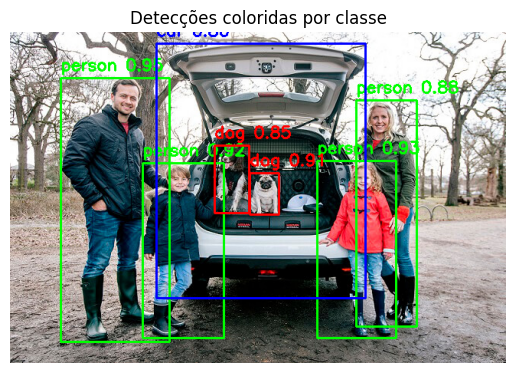

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Instalar a biblioteca Ultralytics
!pip install -q ultralytics

# Importações
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Upload da imagem
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Carregar o modelo YOLOv8x
model = YOLO("yolov8x.pt")

# Parâmetros de confiança
GENERAL_THRESHOLD = 0.60
CAR_THRESHOLD = 0.40

# Cores por classe
class_colors = {
    "person": (0, 255, 0),   # verde
    "dog":    (0, 0, 255),   # azul
    "car":    (255, 0, 0),   # vermelho
    "default": (0, 255, 255) # amarelo para outras
}

# Rodar a predição
results = model(image_path)

# Lista de boxes válidas
filtered_boxes = []

print(f"\n=== Objetos detectados ===")
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.model.names[cls_id]

        # Filtrar por classe e confiança
        if (label == "car" and conf >= CAR_THRESHOLD) or (label != "car" and conf >= GENERAL_THRESHOLD):
            print(f"Classe: {label}, Confiança: {conf:.2f}")
            filtered_boxes.append((box, label, conf))

# Carregar imagem original
img = cv2.imread(image_path)

# Desenhar bounding boxes com cores por classe
for box, label, conf in filtered_boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    texto = f"{label} {conf:.2f}"

    # Usar cor específica da classe ou cor padrão
    color = class_colors.get(label, class_colors["default"])

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, texto, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Salvar imagem anotada
output_path = "imagem_colorida.png"
cv2.imwrite(output_path, img)

# Exibir imagem final
img_pil = Image.open(output_path)
plt.imshow(img_pil)
plt.axis("off")
plt.title("Detecções coloridas por classe")
plt.show()

# Permitir download
files.download(output_path)